In [1]:
!pip install matching

  Using cached matching-1.4.3-py3-none-any.whl (30 kB)


In [2]:
suitor_preferences = {
     "A": ["D", "E", "F"], "B": ["D", "F", "E"], "C": ["F", "D", "E"]
}
reviewer_preferences = {
     "D": ["B", "C", "A"], "E": ["A", "C", "B"], "F": ["C", "B", "A"]
}

In [3]:
from matching.games import StableMarriage
game = StableMarriage.create_from_dictionaries(
     suitor_preferences, reviewer_preferences
)
game.solve()

{A: E, B: D, C: F}

In [4]:
# user just have preferences 
user1_pref = {"AI": 1, "Fitness" : 4, "Travel" : 5}
user2_pref = {"AI": 3, "Fitness" : 1, "Travel" : 1}
user3_pref = {"AI": 3, "Fitness" : 1, "Travel" : 1}
user4_pref = {"AI": 3, "Fitness" : 1, "Travel" : 1}

# matrix 

In [5]:
import numpy as np 

def convert_preferences_to_matrix(users_preferences):
    # Get the list of all topics from the user preferences
    all_topics = set().union(*users_preferences)

    # Create a NumPy matrix from the user preferences
    pref_matrix = np.array([[user_pref.get(topic, 0) for topic in all_topics] for user_pref in users_preferences])

    return pref_matrix

convert_preferences_to_matrix([user1_pref, user2_pref, user3_pref, user4_pref])

array([[4, 5, 1],
       [1, 1, 3],
       [1, 1, 3],
       [1, 1, 3]])

In [10]:
!pip install scikit-learn
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.0 MB/s eta 0:00:0000:0100:01


In [11]:
import os 
import sys
sys.path.append(os.path.join(os.getcwd(), '..', "functions" ))

from functions.matching_users import create_matches_from_users
from functions.data import *
#from functions.data import create_fake_users

In [12]:
# we need to import the matching algorithm but now I have some users first
users = [User("1", {"preferences": {
                            "guns": 5,
                            "dogs": 5
                        },
                        "days": [
                            "mon",
                            "fri"
                        ],
                        "name": "John Wick",
                        "id": "1"
                        }), 
            User("2", {"preferences": {
                            "guns": 5,
                            "dogs": 3
                        },
                        "days": [
                            "mon",
                            "fri"
                        ],
                        "name": "John Shirt",
                        "id": "2"
                        }), 
            User("3", {"preferences": {
                            
                        },
                        "days": [
                            "mon",
                            "fri"
                        ],
                        "name": "John Pants",
                        "id": "3"
                        }), ]
print([(match1.id,match2.id)  for match1,match2 in create_matches_from_users(users)])

[('1', '2'), ('2', '1')]


/home/noverney/miniconda3/lib/python3.10/site-packages/matching/algorithms/stable_roommates.py:141: NoStableMatchingWarning: The following players have been rejected by all others, emptying their preference list: [3]
  warnings.warn(


In [38]:
from time import time
times = []

test_vals = [y-2 for y in [x for x in range(2,1100)][::100]]
test_vals[0] = 2

for i in test_vals:
    start = time()
    fake_users = create_fake_users(i)
    matches = [(match1.id,match2.id)  for match1,match2 in create_matches_from_users(fake_users)]
    times.append(time()-start)
    #print(len(matches))

In [35]:
print(test_vals)

[2, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


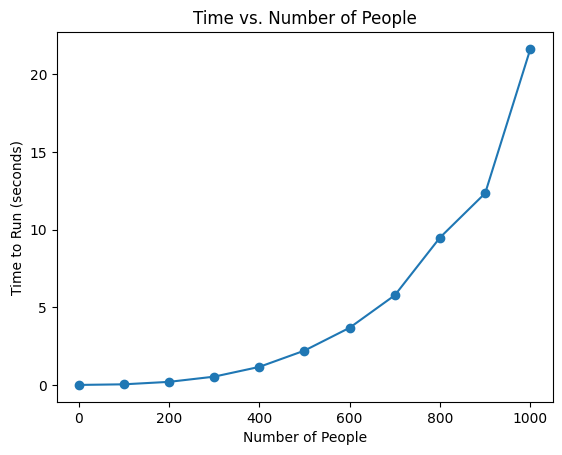

In [39]:

import matplotlib.pyplot as plt
# Create a line chart
plt.plot([x for x in test_vals], times, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Number of People')
plt.ylabel('Time to Run (seconds)')
plt.title('Time vs. Number of People')

# Display the chart
#plt.grid()
plt.show()

In [67]:
# now we can think of testing for larger scenerios
# we can do a graph of the plots 
from functions.matching_users import convert_preferences_to_matrix
from functions.matching_users import get_preference_lists
from sklearn.metrics.pairwise import cosine_similarity
!pip install networkx

import matplotlib.pyplot as plt
import networkx as nx

def plot_graph(num_users):
    users = create_fake_users(num_users)
    names = [x.id for x in users]
    pref_matrix = convert_preferences_to_matrix([x.preferences for x in users])

    user_preferences = cosine_similarity(pref_matrix)
    # so we essentailly have name -> name weight
    print(user_preferences)

    # preference_order = get_preference_lists(names, pref_matrix)
    #print(preference_order)
    G = nx.Graph()

    for x in range(len(user_preferences)):
        for y in range(len(user_preferences[0])):
            if user_preferences[x][y] >= 0.5 and x != y:
                G.add_edge(x,y, weight=user_preferences[x][y])
    nx.draw(G, with_labels=True, font_weight='bold')

[[1.         0.42291291 0.28005602 0.         0.59016711 0.
  0.18786729 0.21938173 0.67943861 0.44781108 0.47769732 0.
  0.         0.36380344 0.2503867  0.72315664 0.         0.45186892
  0.26044681 0.41251432 0.48809353 0.         0.30869745 0.10090092
  0.26792657]
 [0.42291291 1.         0.         0.32879797 0.22629429 0.30172571
  0.36018014 0.56079971 0.56561272 0.11447276 0.70214689 0.32879797
  0.         0.58123819 0.26669037 0.51349617 0.         0.04559608
  0.34328935 0.17574991 0.10397505 0.         0.26303838 0.48361941
  0.4280585 ]
 [0.28005602 0.         1.         0.         0.28097574 0.28097574
  0.372678   0.52223297 0.6384424  0.28426762 0.         0.
  0.40824829 0.57735027 0.52981294 0.         0.40824829 0.33968311
  0.73623505 0.21821789 0.         0.81649658 0.         0.
  0.1594482 ]
 [0.         0.32879797 0.         1.         0.6882472  0.22941573
  0.         0.         0.41702883 0.         0.74278135 0.
  0.         0.         0.         0.         

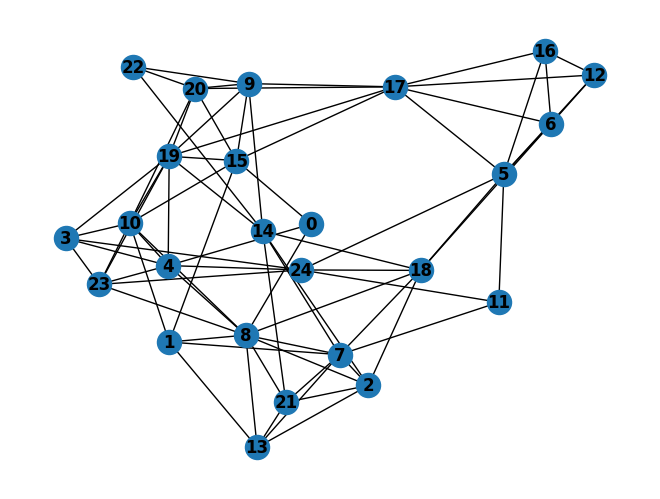

In [68]:
plot_graph(25)

#### For 500 it is around three seconds!
#### For 1000 it is around 16 seconds! 